In [ ]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from scipy import signal
import plotly.express as px 
import cv2
drive.mount('drive')

Mounted at drive


In [ ]:
def greyscale(image):
  image = (0.3 * image[:, :, 0]) + (0.59 * image[:, :, 1]) + (0.11 * image[:, :, 2])
  return image.astype(np.float32)

(1536, 2048)


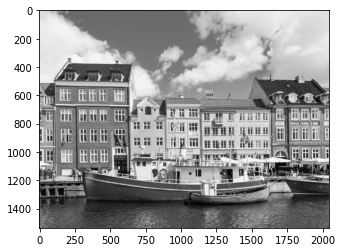

In [ ]:
img = Image.open("/content/drive/MyDrive/coding/Image Blending/copenhagen.png")
im = np.array(img)
g = greyscale(im)
plt.imshow(g, cmap="gray")
print(g.shape)

(1536, 2048)


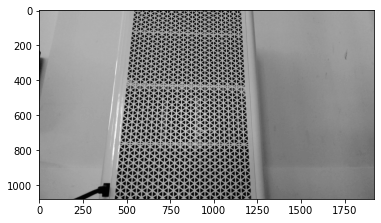

In [ ]:
img2 = Image.open("/content/drive/MyDrive/coding/Image Blending/machine.jpg")
im2 = np.array(img2)
g2 = greyscale(im2)
plt.imshow(g2, cmap="gray")
print(g.shape)

In [ ]:
kern = np.array([
      [-1, -1, -1],
      [-1, 8, -1],
      [-1, -1, -1]   
])
conv = signal.convolve2d(g, kern, mode="same")

In [ ]:
kernals = {}
altered = {}

In [ ]:
kernals['sobel_top'] = np.array([
                                 [1, 2, 1], 
                                 [0, 0, 0],
                                 [-1, -2, -1]
])
kernals['sobel_bottom'] = np.array([
                                 [-1, -2, -1], 
                                 [0, 0, 0],
                                 [1, 2, 1]
])
kernals['sobel_left'] = np.array([
                                 [1, 0, -1], 
                                 [2, 0, -2],
                                 [1, 0, -1]
])
kernals['sobel_right'] = np.array([
                                 [-1, 0, 1], 
                                 [-2, 0, 2],
                                 [-1, 0, 1]
])
altered['sobel_top'] = signal.convolve2d(g2, kernals['sobel_top'], mode="same")
altered['sobel_bottom'] = signal.convolve2d(g2, kernals['sobel_bottom'], mode="same")
altered['sobel_left'] = signal.convolve2d(g2, kernals['sobel_left'], mode="same")
altered['sobel_right'] = signal.convolve2d(g2, kernals['sobel_right'], mode="same")

Text(0.5, 1.0, 'sobel_right')

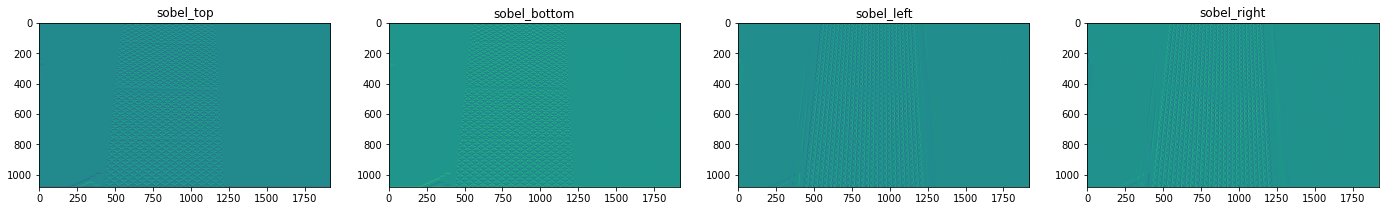

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(24, 12))
im0 = ax0.imshow(altered['sobel_top'])
im1 = ax1.imshow(altered['sobel_bottom'])
im2 = ax2.imshow(altered['sobel_left'])
im1 = ax3.imshow(altered['sobel_right'])
ax0.set_title('sobel_top')
ax1.set_title('sobel_bottom')
ax2.set_title('sobel_left')
ax3.set_title('sobel_right')

Text(0.5, 1.0, 'combined')

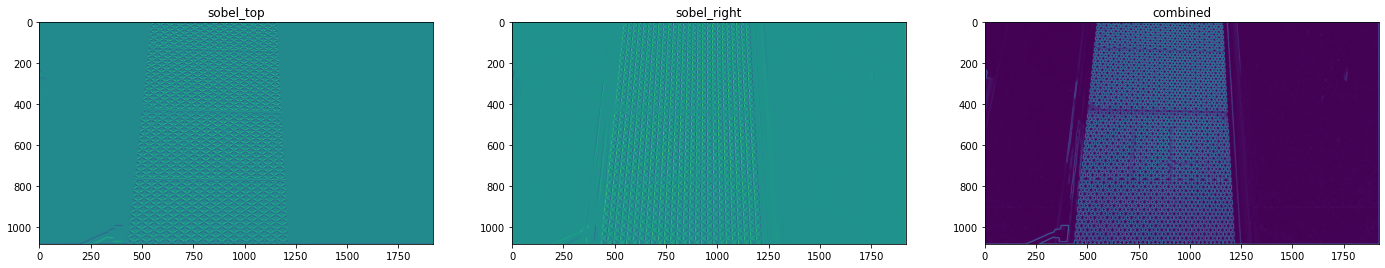

In [ ]:
top_right = np.sqrt(np.square(altered['sobel_top']) + np.square(altered['sobel_right']))
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24, 12))
im0 = ax0.imshow(altered['sobel_top'])
im1 = ax1.imshow(altered['sobel_right'])
im2 = ax2.imshow(top_right)
ax0.set_title('sobel_top')
ax1.set_title('sobel_right')
ax2.set_title('combined')